## Introduccion a Matplotlib

<a id="indice"></a>
<h2><font size=4>Índice</font></h2>


* [I. Introducción](#section1)
    * [Estructura de Matplotlib](#section11)
* [II. Elementos de un gráfico](#section2)    
* [III. Gráficos con <font face="monospace"> pyplot </font>](#section3) 
    * [Elaboración de un gráfico básico con  <font face="monospace"> plot()</font>](#section31)
    
* [IV. Gráficos con la API](#section4)     
    * [Acceso a los elementos del gráfico](#section41)
    * [Elementos adicionales](#section42)
    * [Estilos](#section43)  
    * [Algunas gráficas](#section44) 
* [V. Múltiples grafos en una figura](#section5)
    * [<font face="monospace"> pyplot.subplot()</font>](#section5) 
    * [<font face="monospace"> pyplot.subplots()</font>](#section5)  
    * [<font face="monospace"> pyplot.subplot2grid() </font> y <font face="monospace"> gridspec.GridSpec() </font>](#section5)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "retina"

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
En esta libreta, y con el fin de aportar información adicional a la que se va a tratar, se proporcionan enlaces a la documentación oficial de *pandas* que se representan como **( + inf )**. 
</div>

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>

---

<a id="section1"></a> 
<h2><font color="#B51700" size=5>I.</font> <font size=5 color="#5E5E5E">Introducción</font></h2>
<br>

_Matplotlib_ es la librería de referencia de _Python_ para la elaboración de gráficas en análisis de datos. Posteriormente han surgido otras como: _Seaborn_, que es una capa construída por encima de _Matplotlib_ que facilita la elaboración de figuras complejas de manera sencilla;  _Bokeh_, que está orientada a la elaboración de gráficos interactivos para web; o _Plotly_, en el que las gráficas son parte de una herramienta más compleja. Sin embargo, _Matplotlib_ sigue siendo la librería más usada en ciencia de datos, con la ventaja que ello conlleva, ya que además de la documentación oficial, en la web existe abundante información relativa a ejemplos o solución de problemas concretos.

En esta introducción se verán los elementos necesarios para la elaboración de gráficos más comunes. Para la elaboración de gráficos específicos, se pueden consultar la página oficial de la librería [**( + inf )**](http://matplotlib.org/) y, sobre todo,  las numerosas galerías de ejemplos [**( + inf )**](http://matplotlib.org/examples/index.html) existentes en la red. 


<div class="alert alert-block alert-danger">
    
<i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
**Disclaimer:**  Este tutorial está orientado principalmente a la ___descripción de la herramienta___. Por eso se ha intentado cubrir una gran parte de situaciones y posibilidades, a pesar de que esto supone un sacrificio de la estética y las buenas prácticas de visualización (que se abordarán en módulos posteriores del máster) <i class="fa fa-smile-o" aria-hidden="true"></i>.  
</div>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section11"></a> 
## <font color="#5E5E5E">Estructura de Matplotlib </font>


La arquitectura de la librería _Matplotlib_ se distribuye en 3 capas que, ordenadas de mayor a menor nivel de abstracción, son:

1. La capa de _Scripting_, que se sitúa en el nivel superior, y permite la elaboración de gráficos sin necesidad de acceder a las capas inferiores. 

2. La API de _Artists_ u objetos gráficos, que implementa todos los objetos y métodos que permiten componer los gráficos.

3. La capa _Backend_, que se sitúa en el nivel más bajo, y se encarga de la renderización de los objetos gráficos.

A continuación, se describe brevemente cada una de ellas.

### <font color="#5E5E5E">La capa de _scripting_ </font>

El módulo principal de esta capa es `matplotlib.pyplot`. Proporciona una interfaz, parecida a la de otras herramientas como _Matlab_, que permite elaborar las gráficas directamente y también gestionar la creación de figuras y el _backend_  [**( + inf )**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html). 

La siguiente celda de código construye una gráfica sencilla y le asigna un título. Tanto la creación de la figura a bajo nivel, como la construcción de la gráfica y el acceso a sus elementos (en este caso el título) se hace a través de `matplotlib.pyplot`.

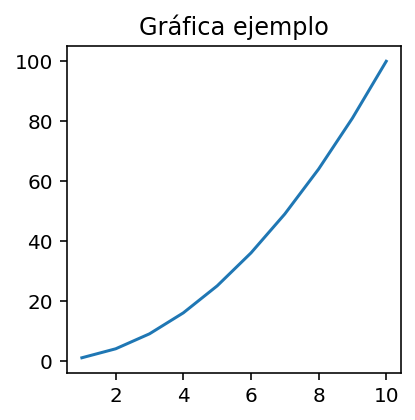

In [2]:
%matplotlib inline

plt.figure(figsize=(3,3))
plt.plot([1,2,3,4,5,6,7,8,9,10],[1,4,9,16,25,36,49,64,81,100])
plt.title("Gráfica ejemplo");

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
 &nbsp; En este tutorial se trabajará principalmente con `matplotlib.pyplot` (en adelante nos referiremos a éste módulo simplemente como `pyplot`), por ser éste el modo de uso más común de _Matplotlib_.
</div>

### <font color="#5E5E5E">La API de _artists_ u objetos gráficos </font>

En esta capa se implementan todos los objetos gráficos o _artists_. Prácticamente todos los elementos y las operaciones de dibujo son accesibles directamente a través de la clase `matplotlib.axes.Axes`, que representa la superficie de la gráfica. No obstante, _sí que es común delegar las funciones de más bajo nivel_, como la creación de la figura, o el enlace con el _backend_, a la capa superior.

La siguiente gráfica, similar a la anterior, se construye de este modo. También se enumeran los objetos gráficos que la componen. Pueden apreciarse algunas componentes como los bordes de la imagen (`Spine`), los ejes $x$ e $y$ (`XAxis,YAxis`), los títulos ( `Text`), que están vacíos, y también el objeto que contiene la colección de puntos que componen la línea.

Objetos del gráfico:
	 Line2D(_line0)
	 Spine
	 Spine
	 Spine
	 Spine
	 XAxis(27.0,27.0)
	 YAxis(27.0,27.0)
	 Text(0.5, 1.0, 'Gráfica ejemplo')
	 Text(0.0, 1.0, '')
	 Text(1.0, 1.0, '')
	 Rectangle(xy=(0, 0), width=1, height=1, angle=0)

Línea:


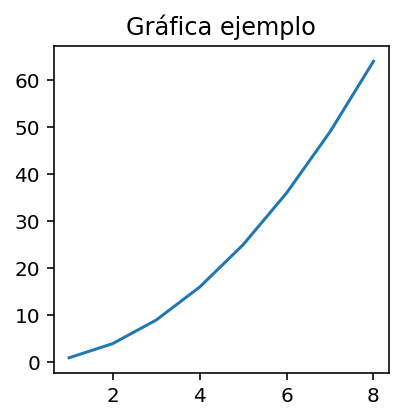

In [3]:
# Crea la figura con pyplot
fig = plt.figure(figsize=(3,3))          

# Utiliza la API para construir la gráfica.

# Accede al objeto Axes
axes = fig.gca()   

# Dibuja desde el objeto Axes
linea = axes.plot([1, 2, 3, 4, 5, 6, 7, 8], [1, 4, 9, 16, 25, 36, 49, 64]);
axes.set_title("Gráfica ejemplo")

# Enumera los objetos.
print("Objetos del gráfico:")
elementos = axes.get_children()  
for elemento in elementos:
    print("\t",elemento)
print("\nLínea:")
print("\t",linea)

### <font color="#5E5E5E">La capa _Backend_ </font>

Es la capa de más bajo nivel, y se encarga de la renderización de los objetos. _Matplotlib_ puede ser utilizado para la generación de gráficos en varios contextos: de manera independiente, en aplicaciones _tk_ o _qt_, en _notebooks_, en archivos de imagen, etc. Debido a que el proceso de renderización depende del contexto, es necesario un _backend_ específico para cada uno de ellos.  La siguiente línea muestra los _backends_ disponibles.

In [4]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


En el caso de las libretas _Jupyter_, se trabaja con dos _backends_ distintos: `inline` y `notebook`. El primero de ellos muestra los gráficos como imágenes estáticas, y es usado frecuentemente cuando las libretas se utilizan como informe (es el usado en los ejemplos anteriores). El segundo permite cierto nivel de interactividad, es más flexible, y es más indicado cuando se han de hacer modificaciones sobre un mismo gráfico de manera progresiva. 

En _Python_, la elección del _backend_ se hace mediante la función `matplotlib.use(nombre_backend)`. En Jupyter, la elección de un _backend_ se puede hacer mediante un _magic_. 

In [5]:
%matplotlib notebook

En realidad, puede verse que la especificación `notebook` hace que se utilice el _backend_ `nbagg`.

In [6]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>

---

<a id="section2"></a> 
<h2><font color="#B51700" size=5>II.</font> <font size=5 color="#5E5E5E">Elementos de un gráfico</font></h2>
<br>


Prácticamente todas las gráficas de _Matplotlib_ comparten un conjunto de elementos comunes. Los más importantes son:


- `figure`, que es el objeto gráfico principal que contiene a todos los demás. Una imagen se construye a partir de una figura, a la que se añaden el resto de componentes.
- `axes`, que contiene una gráfica. Cada figura puede contener varios objetos `axes`, es decir, mostrar varias gráficas. 
- `axis`, que se refiere a los ejes $x$ e $y$  de la gráfica. Éstos, a su vez, contienen otra serie de objetos, como son los `ticks` o puntos que representan la escala, y `ticklabels`, que son las etiquetas de la escala.
- `title`, `xlabel` e `ylabel`, que corresponden al título, etiqueta del eje $x$, y etiqueta del eje $y$, respectivamente. 
- `legend`, que permite asociar las distintas marcas/colores con etiquetas.


La siguiente imagen muestra gráficamente estos objetos.

<img src="../images/matplot.png" alt="Estructura de gráfica" align="center" width="500">

Además, las imagenes se componen a partir de primitivas gráficas básicas (`Line2D`, `Rectangle`, `Text`, etc), que pueden ser situadas arbitrariamente en la figura y representan la información particular. Las propiedades de estos elementos son accesibles y pueden ser modificadas. Bien directamente a través de su API, o a través de la interfaz `pyplot`. 

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>

---

<a id="section3"></a> 
<h2><font color="#B51700" size=5>III.</font> <font size=5 color="#5E5E5E">Gráficos con <font face=monospace size=6> pyplot() </font></font></h2>
<br>



El módulo `matplotlib.pyplot` implementa métodos y objetos para la creación de la mayoría de gráficas de uso común. Estos métodos también permiten acceder y modificar las propiedades de gran mayoría de los elementos (`axis`, `ticks`, `labels`, etc), aunque ocasionalmente se puede combinar con el acceso a la API, ya que ambos modos de trabajo no son incompatibles [**( + inf )**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html).

Con alguna salvedad, las gráficas que se construyen con `pyplot()` (también con la API) se utilizan para representar datos que pueden ser proporcionados en varios formatos: colecciones estándar de _Python_ (tuplas, listas); Arrays _Numpy_; y _Series_ y _DataFrames_ de _Pandas_. Además, `pyplot` permite  trabajar de manera natural con tipos específicos de datos, como por ejemplo `datetime`. Por último, el manejo de las colecciones y tipos de datos es relativamente transparante, por lo que no hay que llevar a cabo ninguna conversión explícita.
<br>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section31"></a> 
## <font color="#5E5E5E"> Elaboración de un gráfico básico con  <font face="monospace"> pyplot.plot()</font> </font>


La función `pyplot.plot()` es la más básica, y se usa para representar series de datos. Además de los valores correspondientes a los ejes $x$ e $y$, `pyplot.plot()` acepta parámetros como el aspecto de los puntos o líneas utilizados para representar los datos, el color, etc [**( + inf )**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).  Algunos de los más importantes son:

- `marker`. Código de la marca (objeto gráfico) con el que se dibuja cada punto. En la documentación de `plot` se describen con detalle las marcas [**( + inf )**](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers). 
- `markerfacecolor`, `markeredgecolor`. Color de la marca y de la línea que la delimita.
- `markersize`, `markeredgewidth`. Tamaño de la marca y anchura de la línea que la delimita.  
- `linestyle`, `linewidth`. Estilo de la línea usada para unir los puntos y  anchura. 
- `color`. Color por defecto para las marcas y línea que las une. Si se ha indicado el color de las marcas, solamente afecta a las líneas. 
- `label`. Etiqueta que permite identificar la serie. 

El siguiente ejemplo se muestra la puntuación de los tres equipos a lo largo de las jornadas. Muestra varias llamadas sucesivas a `plot` con varias combinaciones de parámetros ilustrativas. Cuando se invoca `plot()` varias veces, dibuja las series sobre la figura activa.

<IPython.core.display.Javascript object>


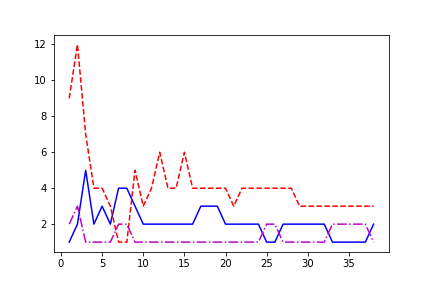

In [7]:
%matplotlib notebook

# Lee los datos
datos_liga = pd.read_csv("../data/datos_liga.csv", index_col=0)
jornada = datos_liga.index

# Figura
plt.figure(figsize=(6,4))
plt.plot(jornada, datos_liga["Barcelona"], color="blue", linestyle="-");
plt.plot(jornada, datos_liga["Atlético"], color="red", linestyle="--");  
plt.plot(jornada, datos_liga["R. Madrid"], color="m", linestyle="-.");


# Dibuja la serie con cuadrados (s) de color rojo (r), tamaño 5, y con una línea contínua (-) de color azul ("blue")
# plt.plot(jornada, datos_liga["Barcelona"], marker="s", markerfacecolor="r", markersize=5, color="blue", linestyle="-");

# Dibuja la serie con estrellas (*) de tamaño 10, con interior blanco (w), con borde de color rojo("red") y sin línea.
#plt.plot(jornada, datos_liga["Atlético"], marker="*", markersize=10, markerfacecolor="w", linestyle="None", color="red");  

# Dibuja la serie con una línea de color magenta
#plt.plot(jornada, datos_liga["R. Madrid"], color="m", linewidth=2);

La función `pyplot.plot()` también permite representar varias series de datos en una con una sola llamada. En este caso, se pueden elegir los colores y marcadores de cada serie directamente con un String [**( + inf )**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). Este modo de funcionamiento también admite parámetros. Sin embargo, éstos se aplican a cada una de las series. 

En el ejemplo siguiente, todas las series se muestran con una línea discontínua (`--`) y el interior de las marcas de color blanco (`w`).

<IPython.core.display.Javascript object>


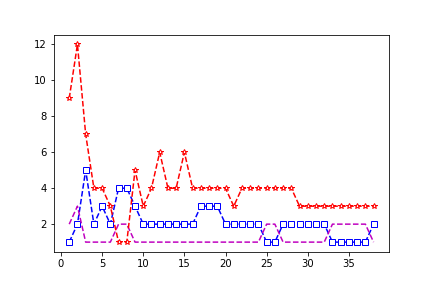

In [8]:
plt.figure(figsize=(6,4))
plt.plot(jornada, datos_liga["Barcelona"], "bs", 
         jornada, datos_liga["R. Madrid"], "m",
         jornada, datos_liga["Atlético"], "r*",  
         linestyle="--", markerfacecolor="w");

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>

---

<a id="section4"></a> 
<h2><font color="#B51700" size=5>IV.</font> <font size=5 color="#5E5E5E">Gráficos a con la API </font></h2>
<br>

La elaboración de gráficos con la API se hace a través del objeto `Axes` mediante `Axes.plot()`. Su interfaz es parecida a la de `plt.plot()`. Como la creación de figuras se suele hacer siempre mediante `plt`, es necesario acceder al objeto `Axes` activo mediante `plt.gca()`.

<IPython.core.display.Javascript object>


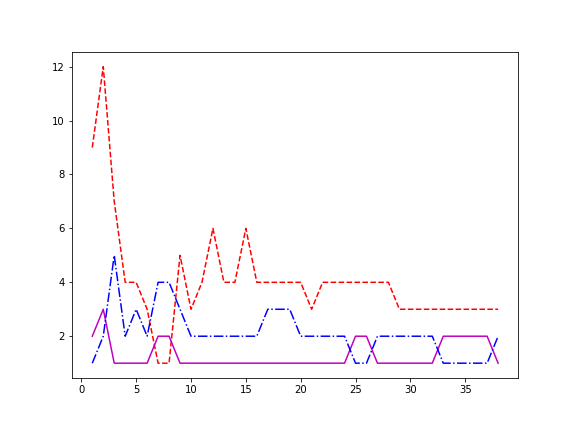

In [9]:
plt.figure(figsize=(8,6))
ax = plt.gca()

line_am = ax.plot(jornada, datos_liga["Atlético"], "r--", label="Atlético de Madrid");
line_rm = ax.plot(jornada, datos_liga["R. Madrid"], "m-", label="Real Madrid");
line_fb = ax.plot(jornada, datos_liga["Barcelona"], "b-.",label="FC Barcelona");

Otra posibilidad consiste en utilizar la función `plt.subplots()` para crear la figura y el (o los, esto se verá después) objetos `Axes`. Ésta devuelve una referencia a la figura y una a él (o los) objeto `Axes`.

<IPython.core.display.Javascript object>


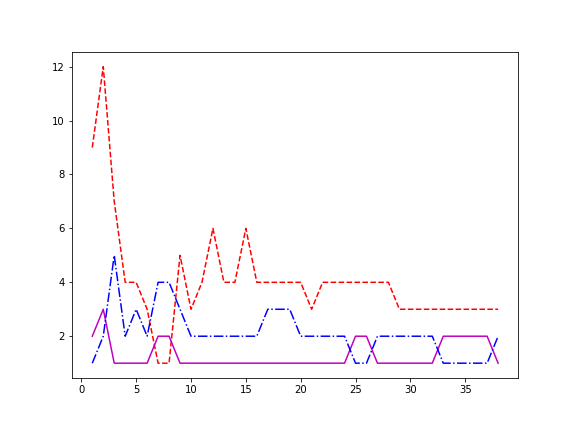

In [10]:
f, ax = plt.subplots(figsize=(8,6))

line_am = ax.plot(jornada, datos_liga["Atlético"], "r--", label="Atlético de Madrid");
line_rm = ax.plot(jornada, datos_liga["R. Madrid"], "m-", label="Real Madrid");
line_fb = ax.plot(jornada, datos_liga["Barcelona"], "b-.",label="FC Barcelona");

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section41"></a> 
## <font color="#5E5E5E"> Acceso a los elementos de un gráfico (mediante API)</font>
El objeto `Axes` (también el módulo `pyplot`) proporciona funciones que permiten acceder a los distintos elementos del gráfico (los que no son la serie). A continuación se dibuja una figura similar a la anterior para, posteriormente, ir modificándola con cada uno de ellos. 

<IPython.core.display.Javascript object>


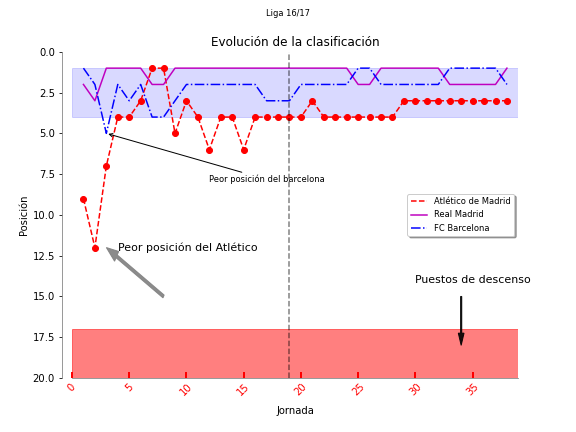

In [11]:
f, ax = plt.subplots(figsize=(8, 6))

line_am = ax.plot(jornada, datos_liga["Atlético"], "r--", label="Atlético de Madrid");
line_rm = ax.plot(jornada, datos_liga["R. Madrid"], "m-", label="Real Madrid");
line_fb = ax.plot(jornada, datos_liga["Barcelona"], "b-.",label="FC Barcelona");


### <font color="#5E5E5E"> Títulos y etiquetas</font> 

El título de la gráfica se fija mediente el método `Axes.title()` y el de la figura (en la parte superior) mediante `Figure.suptitle()`. Las etiquetas de los ejes, mediante los métodos `Axis.set_xlabel()` y `Axes.set_ylabel()`.

In [12]:
# Título superior
f.suptitle("Liga 16/17", fontsize="small") # Se cambia el tamaño de la fuente

# Título
ax.set_title("Evolución de la clasificación") 

# Etiquetas de los ejes
ax.set_xlabel("Jornada", color="black", labelpad=8)  # Se cambia el color de la fuente y se aleja
ax.set_ylabel("Posición", color="black");

### <font color="#5E5E5E"> Ejes </font> 

El rango de cada eje se establece mediante los métodos `Axes.set_xlim()` e `Axes.set_ylim()`. Es posible establecer los rangos de mayor a menor valor, cambiando así el aspecto de la gráfica. 


El método  `Axes.tick_params()` [(enlace)](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html)  especifica cómo se muestran los ticks en cada eje, y permite también especificar cuales se muestran.  Los métodos `Axes.set_xticks()` y `Axes.set_yticks()` permiten especificar los puntos y etiquetas en los que se muestran los ticks. 

In [13]:
# Rangos
ax.set_xlim(0, 39)
ax.set_ylim(20, 0);

# Qué ticks se muestran
ax.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=True)
# Cambia el aspecto de los ticks del eje x
ax.tick_params(axis="x", direction="in", length=6, width=2, colors="r", labelrotation=45)


# Cambia los tickes del eje x. 
jornadas_ejes = [1, 19, 38]                   # Puntos donde se dibujan los ticks. 
jornadas_str = ["primera", "mitad", "final"]  # Etiquetas

# Añade los ticks. Indica que el color será gris, que el tamaño 
# de las etiquetas será pequeño, y que éstas se rotarán 45 grados. 
#ax.set_xticks(jornadas_ejes, jornadas_str)

# Cambia los ticks del eje y.
#ax.set_yticks([1, 2, 3, 20], ["1º", "2º", "3º", "Colista"]);

### <font color="#5E5E5E"> Leyenda </font> 

En los gráficos, además, se pueden incluir leyendas.  Esto se hace automáticamente añadiendo una etiqueta a cada serie (no tiene por qué ser la que se muestra en la figura), y luego invocando `Axes.legend()` con los parámetros correspondientes. Uno de ellos, `loc`, determina dónde se coloca la leyenda. Si se asigna el valor `best` la leyenda se coloca automáticamente, y puede cambiar de ubicación al añadir o borrar elementos. Información con respecto a leyendas puede encontrarse aquí [**( + inf )**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend). Para leyendas más complejas puede consultarse esta guía [**( + inf )**](http://matplotlib.org/users/legend_guide.html).

In [14]:
# Establece la leyenda en la gráfica. La localiza automáticamente. 
ax.legend(loc="best", fontsize="small", shadow=True);

### <font color="#5E5E5E"> Modificación de parámetros: <font face="monospace"> setp()</font> </font> 

La función `setp()` permite consultar y modificar los parámetros de los objetos gráficos. En el ejemplo anterior, se han almacenado las líneas en las variables `line_am`,`line_rm`, y `line_fb`. 

In [15]:
from matplotlib.artist import getp, setp

# Muestra todos los parámetros de la línea. Lo comentamos por claridad. 
getp(line_am)

# Establece el parámetro. 
setp(line_am, marker="o");

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = r
    contains = None
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11...
    drawstyle or ds = default
    figure = Figure(576x432)
    fillstyle = full
    gid = None
    in_layout = True
    label = Atlético de Madrid
    linestyle or ls = --
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = r
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = r
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[ 1.,  9.],        [ 2., 12.],        ...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
    sketch_params = None
    snap = None
    solid_capstyle = projecting
    solid

### <font color="#5E5E5E"> Modificación del rectángulo contenedor</font> 

El objeto `Axes.spines()` constituyen uno de ellos. El siguiente código borra los márgenes derecho y superior, y colorea de gris el izquierdo y el inferior.


In [16]:
# Borra los márgenes derecho y superior
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Cambia el color de los otros márgenes. 
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")

## Mueve el eje 10 unidades hacia fuera
ax.spines["left"].set_position(("outward", 10))

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>

---



<a id="section42"></a> 
## <font color="#5E5E5E"> Elementos adicionales</font>


###  <font color="#5E5E5E">  Líneas y rectángulos </font>

Los métodos `Axes.axvline()` y `Axes.axhline()` dibujan líneas verticales y horizontales, respectivamente. Mediante `Axes.axvspan()` y `Axes.axhspan()` se pueden dibujar rectángulos. Estas últimas funciones aceptan un parámetro, denominado `alpha` que regula la transparencia del objeto y que es común a prácticamente todos los objetos gráficos.  

In [17]:
# Marca con un rectángulo horizontal los puestos de champions, y con otro los de descenso.
ax.axhspan(1, 4, alpha=0.15, color="b") # Este rectángulo es azul y casi transparente. 
ax.axhspan(17, 20, alpha=0.5, color="r") # Este rectángulo es rojo y menos transparente. 

# Dibuja una línea que marca la mitad de la temporada
ax.axvline(19, color="black", linestyle="--", alpha=0.5);

###  <font color="#5E5E5E">  Texto  </font>

El texto se añade mediante `Axes.text()`. Los dos primeros parámetros constituyen el punto de referencia. Los parámetros `horizontalalignment` y `verticalalignment` determinan cómo debe ser la alineación del texto con respecto a este punto.

In [18]:
ax.text(30, 14, 
         "Puestos de descenso", 
         horizontalalignment="left", 
         verticalalignment="center", 
         fontsize=11);

ax.text(datos_liga["Atlético"].idxmax() + 2, datos_liga["Atlético"].max(), 
         "Peor posición del Atlético", 
         horizontalalignment="left", 
         verticalalignment="center", 
         fontsize=11);

###  <font color="#5E5E5E">  Flechas y anotaciones  </font>



El método `Axes.arrow()` permite dibujar flechas. Toma como primeros parámetros las coordenadas $x$ e $y$ del origen, y después las coordenadas de la punta en relación a este punto. Otros parámetros determinan si la longitud incluye la punta, la forma, etc. La siguiente figura dibuja una flecha que apunta al punto en que el Atlético de Madrid registró su peor clasificación. Como el punto de referencia es la punta, se ha desplazado el origen.




In [19]:
ax.arrow(34, 15, 0, 3, 
          length_includes_head="True", shape="full", color="black", alpha=0.9, width=0.1, head_width=0.5)

ax.arrow(datos_liga["Atlético"].idxmax()+1+5, datos_liga["Atlético"].max()+3, -5,-3, 
          length_includes_head="True", shape="full", color="grey", alpha=0.9, width=0.2, head_width=0.7);

Cuando se utilizan flechas y texto para hacer una anotación, se puede hacer directamente con el método `Axes.annotate`. Ésta toma como parámetros las coordenadas de la punta de la flecha y el texto. En ambos casos, se puede especificar qué unidades se utilizan (en el ejemplo los datos). También las propiedades de la flecha. 

In [20]:
# Añade una anotación
ax.annotate("Peor posición del barcelona",
             xy=(datos_liga["Barcelona"].idxmax(), datos_liga["Barcelona"].max()),  
             xycoords="data", 
             xytext=(12, 8), 
             textcoords="data", 
             arrowprops=dict(arrowstyle = "->", color="black"), 
             fontsize="small", 
             color="black");

<div class="alert alert-block alert-danger">

<i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
  A esta figura resultante nos referíamos anteriormente con _"no cuidar el aspecto visual"_.
</div>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---


<a id="section43"></a> 
## <font color="#5E5E5E">Estilos</font>

Hasta el momento, todas las gráficas de este tutorial se han elaborado a partir de un estilo básico. Sin embargo, el método `style` de _Matplotlib_ permite cambiar la aparencia de las gráficas, en muchos casos para adaptarlas al contexto (presentación, artículo, notebook, etc). Existe una gran variedad de estilos disponibles, que pueden consultarse en el objeto `pyplot.style.available`.

In [21]:
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


El siguiente código cambia el estilo `ggplot`, y dibuja la serie anterior.

<IPython.core.display.Javascript object>


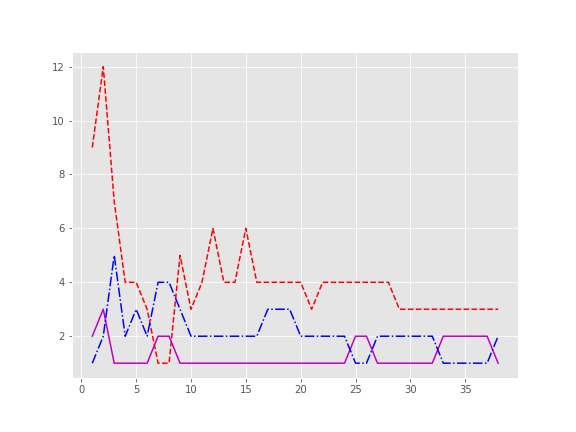

In [22]:
style.use("ggplot")

f, ax = plt.subplots(figsize=(8,6))

line_am = ax.plot(jornada, datos_liga["Atlético"], "r--", label="Atlético de Madrid");
line_rm = ax.plot(jornada, datos_liga["R. Madrid"], "m-",label="Real Madrid");
line_fb = ax.plot(jornada, datos_liga["Barcelona"], "b-.",label="FC Barcelona");

In [23]:
# Restaura el estilo por defecto
style.use("default")

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---


<a id="section44"></a> 
## <font color="#5E5E5E">Algunas figuras</font>

*Matplotlib* implementa numerosas gráficas, que pueden construírse desde la capa de *scripting* o directamente desde la API.


<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
No veremos las gráficas con detalle porque el objetivo es hacer las gráficas con *Seaborn* y utilizar *Matplotlib* solamente para modificar detalles o hacer gráficas muy específicas.
</div>



En esta celda se dibuja un histograma a través de una funcion de la capa de *scripting*.

<IPython.core.display.Javascript object>


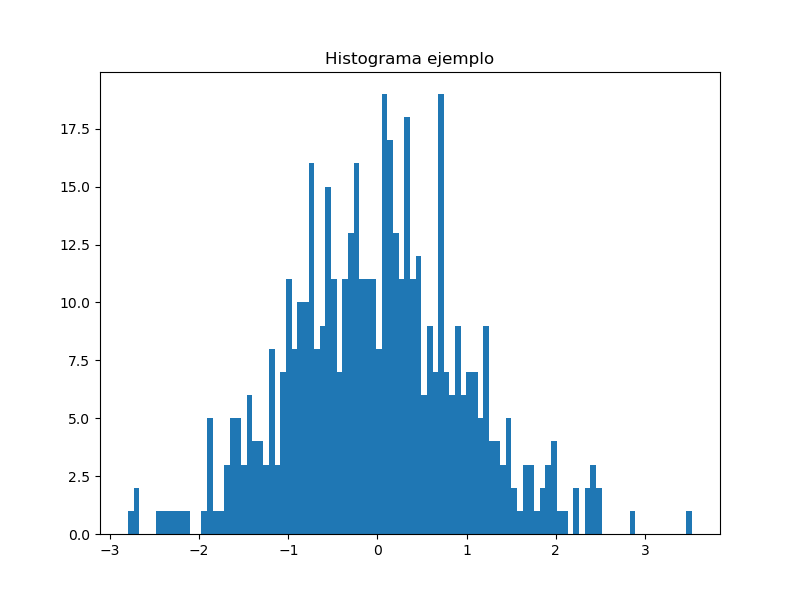

In [24]:
# Crea una distribución bivariada de datos. 
X, Y = np.random.multivariate_normal([0, 0], np.array([[1, 0.8], [0.8, 1]]), 500).T

f, ax = plt.subplots(figsize=(8,6))
ax.hist(X, bins=100);
ax.set_title("Histograma ejemplo");

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>

---

<a id="section5"></a> 
<h2><font color="#B51700" size=5>V.</font> <font size=5 color="#5E5E5E">Múltiples grafos en una figura </font></h2>
<br>


Existen varias formas de componer figuras con varias gráficas (varios objetos `Axes`). 


<a id="section51"></a> 
## <font color="#5E5E5E"> <font face="monospace"> plt.subplot() </font></font>


La llamada a `pyplot.subplot(filas, columnas, posición)` divide la figura actual en una cuadrícula de tamaño _filas x columnas_, y crea un objeto `Axes` en la _posición_  (celda) correspondiente. Permite además tomar como referencia las escalas de otro objeto `Axes` mediante los parámetros `sharex` y `sharey`. Esto resulta de utilidad cuando las figuras han de ser comparadas. 

<IPython.core.display.Javascript object>


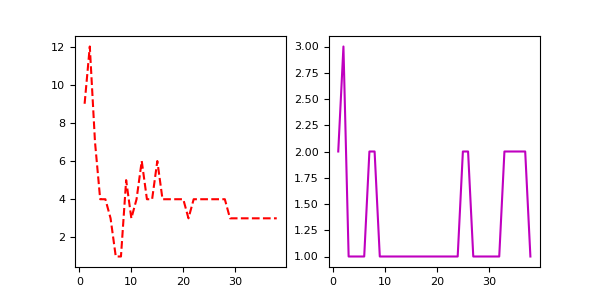

In [25]:
f = plt.figure(figsize=(6,3))
# Figura de la izquierda
ax_izq = plt.subplot(1, 2, 1)
ax_izq.plot(jornada, datos_liga["Atlético"], "r--", label="Atlético de Madrid");

# Figura de la derecha
ax_der = plt.subplot(1, 2, 2)
#ax_der = plt.subplot(1, 2, 2, sharey=ax_izq)
ax_der.plot(jornada, datos_liga["R. Madrid"], "m-", label="Real Madrid");

# Cambia los tamaños de fuente en ambos
ax_der.tick_params(axis="both", labelsize=8)
ax_izq.tick_params(axis="both", labelsize=8)

# Aumenta el espacio entreambos
f.subplots_adjust(hspace=1)

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>

---


<a id="section52"></a> 
## <font color="#5E5E5E"> <font face="monospace"> plt.subplots() </font></font>


Una alternativa a la función anterior consiste en crear los objetso `Axes` con `plt.subplots()`. Ésta admite varios parámetros para controlar la distribución y aspecto de las figuras, incluidos `shareX` y `shareY`. Puede encontrarse más información sobre el manejo de esta función aquí [**( + inf )**](http://matplotlib.org/examples/pylab_examples/subplots_demo.html).

<IPython.core.display.Javascript object>


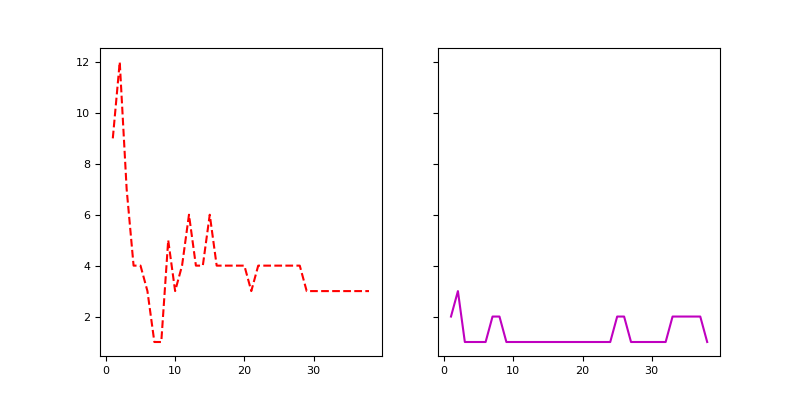

In [26]:
# Crea una figura en la que va a incluir 4 gráficas, distribuídas en una rejilla de 2x2
f, axes_grid = plt.subplots(1, 2, figsize=(8,4), sharey=True);

axes_grid[0].plot(jornada, datos_liga["Atlético"], "r--", label="Atlético de Madrid");
axes_grid[1].plot(jornada, datos_liga["R. Madrid"], "m-", label="Real Madrid");

# Cambia los tamaños de fuente en ambos
axes_grid[0].tick_params(axis="both", labelsize=8)
axes_grid[1].tick_params(axis="both", labelsize=8)

# Aumenta el espacio entreambos
f.subplots_adjust(hspace=1)

plt.show();

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>

---


<a id="section53"></a> 
## <font color="#5E5E5E"> <font face="monospace"> plt.subplot2grid() </font> y <font face="monospace"> gridspec.GridSpec() </font> </font>

<br>

Se pueden hacer composiciones más complejas mediante la función `pyplot.subplot2grid()`. Cada llamada corresponde a una figura, y recibe cuatro parámetros. El primero es una tupla con el tamaño con la rejilla. El segundo la posición en la que se colocará la gráfica. El tercero la anchura, en columnas, de la gráfica. Y el cuarto la altura, en filas. 

<IPython.core.display.Javascript object>


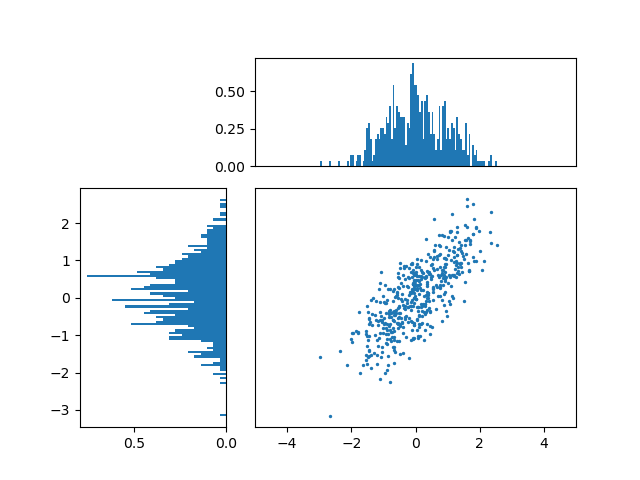

In [27]:
# Crea una distribución bivariada de datos. 
X, Y = np.random.multivariate_normal([0, 0], np.array([[1, 0.8], [0.8, 1]]), 500).T


# Crea un array de objetos para poder iterar sobre los 
axes_grid = np.zeros(3, dtype=object)
plt.figure()

# Dimensiona las figuras
axes_grid[0] = plt.subplot2grid((3,3), (0,1), rowspan=1, colspan=2)
axes_grid[1] = plt.subplot2grid((3,3), (1,0), rowspan=2, colspan=1)
# Da la vuelta al eje x del histograma de la izquierda
axes_grid[1].invert_xaxis()
axes_grid[2] = plt.subplot2grid((3,3), (1,1), rowspan=2, colspan=2)

# Crea las distintas figuras.
axes_grid[0].hist(X, bins=100, density=True)
axes_grid[1].hist(Y, bins=100, orientation="horizontal", density=True);
axes_grid[2].scatter(X, Y, s=2)

# Establece el rango para x de las dos subfiguras
for ax in [axes_grid[0], axes_grid[2]]:
    ax.set_xlim(-5, 5)
    
# Borra los ticks
axes_grid[0].set_xticks([])  
axes_grid[2].set_yticks([]);

Otra forma de hacer esto consiste en pasarle un objeto de tipo `gridspec.GridSpec()` a `pyplot.subplot()`.

<IPython.core.display.Javascript object>


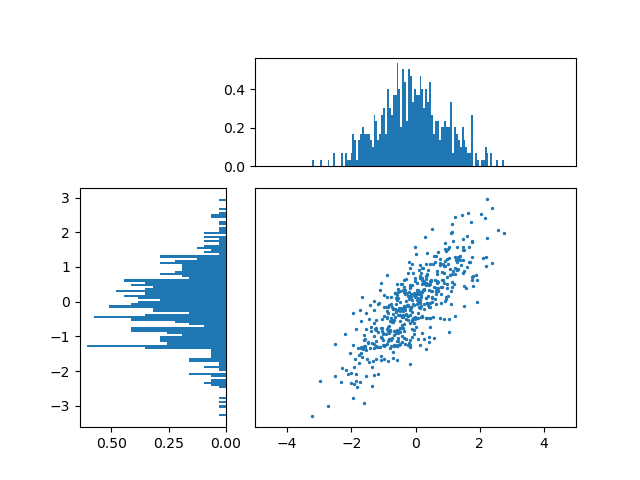

In [28]:
import matplotlib.gridspec as gridspec

plt.figure()

# Crea una rejilla de tres por tres. 
gspec = gridspec.GridSpec(3, 3)

# Primera gráfica, ocupa las dos últimas columnas de la primera fila. 
ax_arriba= plt.subplot(gspec[0, 1:])
# Segunda gráfica, ocupa las dos últimas filas de la primera columna.  
ax_izquierda = plt.subplot(gspec[1:, 0])
# Gráfica principal, ocupa las dos últimas columnas y las dos últimas filas. 
ax_principal = plt.subplot(gspec[1:, 1:])

# Crea una distribución bivariada de datos. 
X, Y = np.random.multivariate_normal([0, 0], np.array([[1, 0.8], [0.8, 1]]), 500).T

# Dibuja la gráfica de dispersión
ax_principal.scatter(X, Y, s=2)
# Dibuja los histogramas de frecuencias (normed)
ax_arriba.hist(X, bins=100, density=True)
#ax_izquierda.hist(Y, bins=100)
ax_izquierda.hist(Y, bins=100, orientation="horizontal", density=True);

# Da la vuelta al eje x del histograma de la izquierda
ax_izquierda.invert_xaxis()

# Establece el rango para x de las dos subfiguras
for ax in [ax_arriba, ax_principal]:
    ax.set_xlim(-5, 5)
    
# Borra los ticks
ax_arriba.set_xticks([])  
ax_principal.set_yticks([]);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>